In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

In [4]:
# get iris data
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [2]:
# 1. Load iris, provide header
df = pd.read_csv('iris.data', header=None)
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.columns = columns

# 1. create a new columns that is the numpy array of the features
df['features'] = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values.tolist()
df['features'] = df['features'].apply(np.array)
# init dataset 
data = np.array(df['features'].values.tolist())

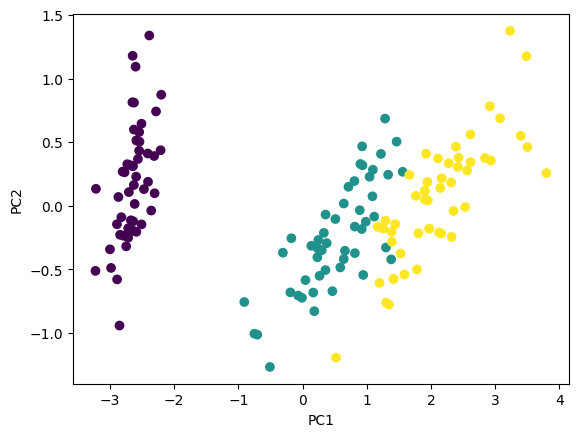

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

plt.scatter(X_r[:, 0], X_r[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

seems like iris dataset is not suit for clustering problem =)))

# KMeans with known n_cluster

perform k means clustering by manually writing the algorithm
- first, select 3 random points as centroids
- then, assign each point to the closest centroid
- then, recompute the centroids
- repeat until the centroids don't change

In [18]:
# 3. Assign each point to the closest centroid

# distance between two points
def distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# set lable for each point
def set_label(data, centroids):
    labels = np.array([])
    for i in range(len(data)):
        distances = []
        for j in range(len(centroids)):
            distances.append(distance(data[i], centroids[j]))
        labels = np.append(labels, np.argmin(distances))
    return labels.astype(int)

# set new centroids
def set_centroids(data, centroids):
    labels = set_label(data, centroids)
    new_centroids = []
    for i in range(len(centroids)):
        new_centroids.append(np.mean(data[np.where(np.array(labels) == i)],axis=0))
    return np.array(new_centroids)

# compute the change of centroids - stop condition
def changes(old_centroids, new_centroids):
    changes = []
    for i in range(len(old_centroids)):
        change = distance(old_centroids[i], new_centroids[i])
        changes.append(change)
    return np.sqrt(np.sum(changes))

In [19]:
def kmeans(data,n_cluster=3, threshold=0.0001) -> any:
    # loop until the centroids meet the threshold
    centroids = np.random.permutation(data)[:n_cluster]
    while True:
        new_centroids = set_centroids(data, centroids)
        
        if changes(new_centroids,centroids) < threshold:
            break
        else:
            centroids = set_centroids(data, centroids)
            labels = set_label(data, centroids)
    return centroids, labels

In [82]:
# run kmeans
centroids, labels = kmeans(data)

In [7]:
def plot_cluster(data, labels):
    pca = PCA(n_components=2)
    X_r = pca.fit_transform(data)

    plt.scatter(X_r[:, 0], X_r[:, 1], c=labels, cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

# KMeans with unknown n_cluster

## Elbow

In [22]:
# Within-cluster Sum of Squares - Elbow Method

def wcss(data, centroids, labels):
    sum_of_squares = []
    for i in range(len(centroids)):
        sum_of_squares.append(np.sum((data[np.where(labels == i)] - centroids[i]) ** 2))
    return np.sqrt(np.sum(sum_of_squares))

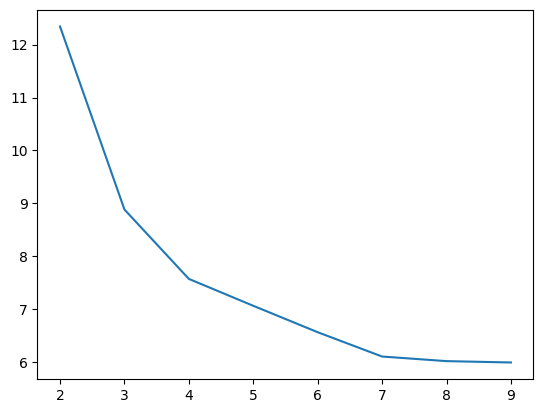

In [23]:
elbows = []
n_cluster = 10
for i in range(2,n_cluster):
    centroids, labels = kmeans(data, n_cluster=i)
    elbows.append(wcss(data, centroids, labels))

plt.plot(range(2,n_cluster), elbows)

## Silhouette Coefficient


In [65]:
def silhoutte(data, labels):
    silhouttes = []
    for i, data_point in enumerate(data):
        # Mean intra-cluster distance
        a = np.mean(distance(data_point, data[np.where(labels == labels[i])]))

        # Mean nearest-cluster distance
        u_labels = np.unique(labels)
        dists = []
        for j in u_labels[u_labels != labels[i]]:
            # Nearest cluster
            dists.append([distance(data_point, data[np.where(labels != labels[i])]), j])
        nearest_cluster = dists[np.argmin(np.array(dists)[:, 0])][1]
        b = np.mean(distance(data[i], data[np.where(labels == nearest_cluster)]))

        # Silhouette score
        s = (b - a) / max(a, b)
        silhouttes.append(s) if s>=0 else False
    return np.mean(silhouttes)

In [66]:
silhoutte(data, labels)

0.3284516795495273

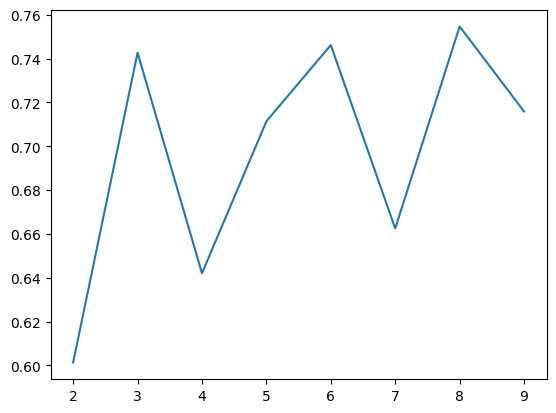

In [86]:
silhouttes = []
n_cluster = 10
for i in range(2,n_cluster):
    centroids, labels = kmeans(data, n_cluster=i)
    silhouttes.append(silhoutte(data, labels))

plt.plot(range(2,n_cluster), silhouttes)

seem like the data ...

# DBSCAN

In [ ]:
# perform DBSCAN clustering manually

